In [1]:
import gc
import warnings
import numpy as np
import pandas as pd
# Sklearn imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
# Visualization
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
# Import dataset
d = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Remove customer IDs from the data set
d = d.iloc[:,1:]

# Remove all seniors from dataset
d = d[d['SeniorCitizen'] == 0]
d = d.drop(columns='SeniorCitizen')

In [4]:
# Reduce the dataset to customers that churned
churners = d['Churn'] == 1
churnset = d[churners]


/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/srv/conda/envs/notebook/lib/python

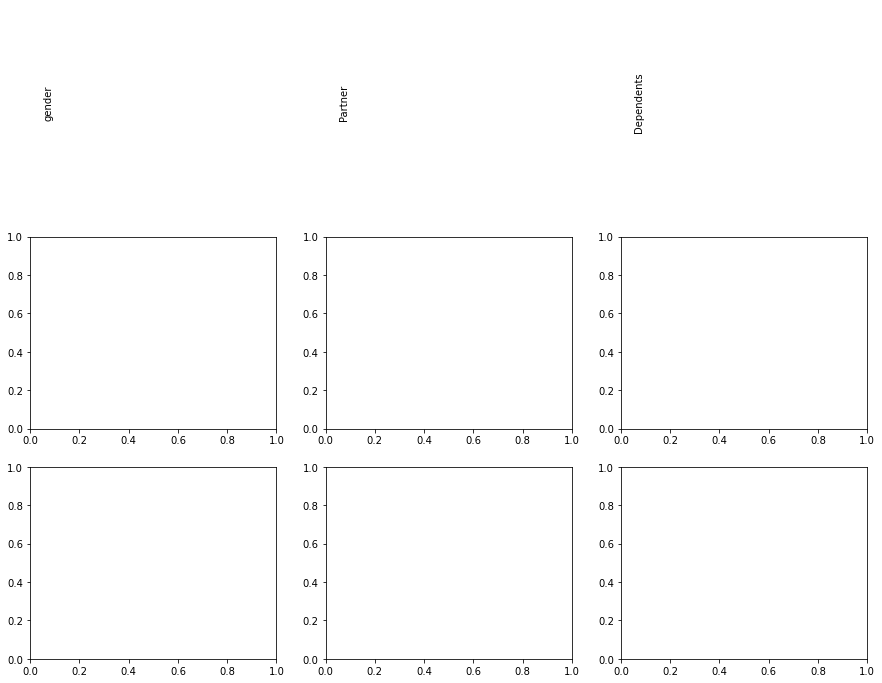

In [5]:
services = ['gender', 'Partner', 'Dependents']

figs, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15, 12))
for i, item in enumerate(services):
    if i < 3:
        (churnset[item].value_counts()*100.0 /len(d)).plot.pie(autopct='%.1f%%', subplots=True, ax=axes[0,i], figsize =(5,5), fontsize = 12 )

In [6]:
# Bar chart showing tenure
